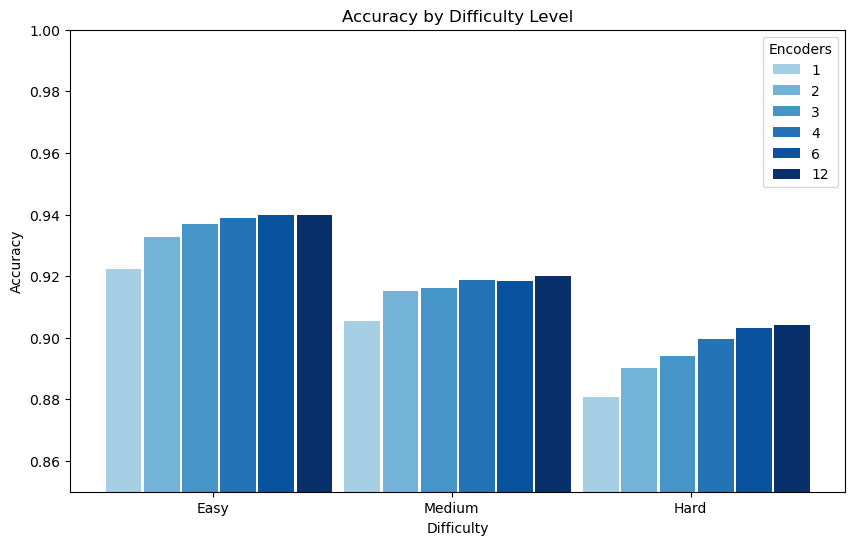

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Easy', 'Medium', 'Hard']
epochs = [1, 2, 3, 4, 6, 12]
scores = {
    1: [0.9223, 0.9054, 0.8807],
    2: [0.9328, 0.9151, 0.8903],
    3: [0.937, 0.9162, 0.8942],
    4: [0.9389, 0.9188, 0.8996],
    6: [0.9397, 0.9185, 0.903],
    12: [0.940, 0.9201, 0.904]
}

num_epochs = len(epochs)
bar_width = 0.15
space = 0.01

x = np.arange(len(categories))

# Generate color gradient
colors = plt.cm.Blues(np.linspace(0.35, 1, num_epochs))

# Plotting the bar plots
plt.figure(figsize=(10, 6))

for i, epoch in enumerate(epochs):
    plt.bar(x + i * (bar_width + space), scores[epoch], width=bar_width, label=f'{epoch}', color=colors[i])

plt.xlabel('Difficulty')
plt.ylabel('Accuracy')
plt.title('Accuracy by Difficulty Level')
plt.xticks(x + bar_width * (num_epochs - 1) / 2, categories)
plt.legend(title='Encoders')
plt.ylim(0.85, 1)

plt.show()

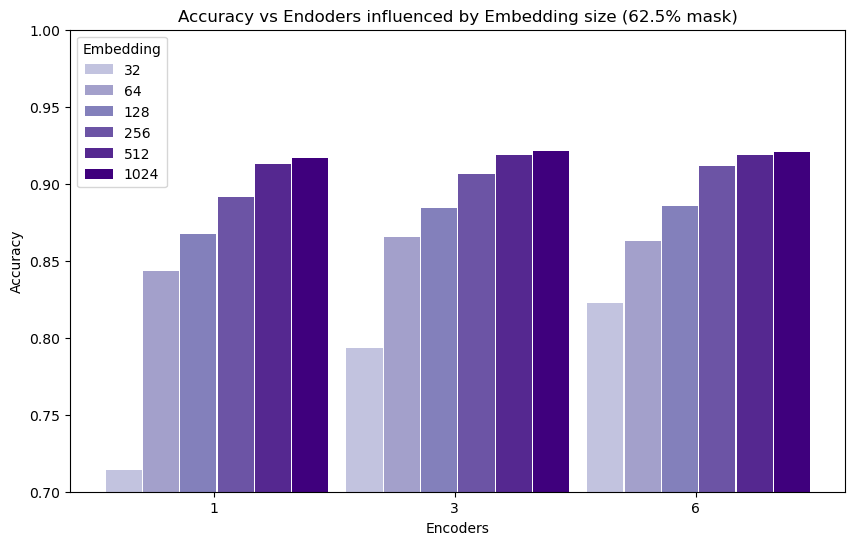

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['1', '3', '6']
epochs = [32,64, 128, 256, 512, 1024]
scores = {
    32: [0.7141, 0.7936, 0.8224],
    64: [0.8436, 0.8651, 0.8626],
    128: [0.8676, 0.8841, 0.8855],
    256: [0.8913, 0.9066, 0.9116],
    512: [0.9131, 0.9185, 0.9186],
    1024: [0.9169, 0.9213, 0.9209]
}

num_epochs = len(epochs)
bar_width = 0.15
space = 0.005

x = np.arange(len(categories))

# Generate color gradient
colors = plt.cm.Purples(np.linspace(0.35, 1, num_epochs))

# Plotting the bar plots
plt.figure(figsize=(10, 6))

for i, epoch in enumerate(epochs):
    plt.bar(x + i * (bar_width + space), scores[epoch], width=bar_width, label=f'{epoch}', color=colors[i])

plt.xlabel('Encoders')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Endoders influenced by Embedding size (62.5% mask)')
plt.xticks(x + bar_width * (num_epochs - 1) / 2, categories)
plt.legend(title='Embedding')
plt.ylim(0.7, 1)

plt.show()

In [1]:
ab_list = open("antibiotic_list_classes.txt","r")
ab_list = ab_list.read().splitlines()

# Create a dictionary to store the indices for each group
group_indices = {}

for index, item in enumerate(ab_list):
    # Split the item into antibiotic and group
    antibiotic, group = item.split('=')
    # If the group is already in the dictionary, append the index to its list
    if group in group_indices:
        group_indices[group].append(index)
    # If the group is not in the dictionary, create a new list with the index
    else:
        group_indices[group] = [index]

# Print the dictionary
for group, indices in group_indices.items():
    print(f"{group}: {indices}")

Aminoglycosides: [0, 24, 26, 36, 40]
PenicillinCombinations: [1, 3, 34]
Penicillins: [2, 33]
Others: [4, 19, 35, 43]
Monobactams: [5]
Cephalosporins: [6, 7, 8, 10, 11, 12, 15, 17, 18]
CephalosporinCombinations: [9, 13, 14, 16]
Quinolones: [20, 21, 27, 30, 31, 32]
Carbapenems: [22, 23, 25, 28]
Tetracyclines: [29, 39]
Sulfonamides: [37, 38, 41, 42]


Experiment 1 Encoders

In [2]:
##data
import pandas as pd
#Sensitivity
OneEncEasyMask = [0.0, 0.325, 0.8633879781420765, 1.0, 0.0, 0.5660377358490566, 0.7539267015706806, 0.34210526315789475, 1.0, 0.8333333333333334, 0.6893203883495146, 0.9642857142857143, 0.6716417910447762, 0, 0.0, 0.8333333333333334, 0.0, 0.8203883495145631, 0.9333333333333333, 0.07017543859649122, 0.8240343347639485, 1.0, 0.2, 0.0, 0.38064516129032255, 0.0, 0.0, 0.9515151515151515, 0.0, 0.0, 1.0, 0.3902439024390244, 0.0, 1.0, 0.0, 0, 0.936046511627907, 0.9777777777777777, 0.8160919540229885, 0.903921568627451, 0.425, 0.7307692307692307, 0.658008658008658, 0]
OneEncMedMask = [0.0, 0.15, 0.8069216757741348, 0.9523809523809523, 0.0, 0.4716981132075472, 0.7277486910994765, 0.14912280701754385, 1.0, 0.5, 0.4077669902912621, 1.0, 0.5124378109452736, 0, 0.0, 0.5, 0.0, 0.7427184466019418, 0.8666666666666667, 0.15789473684210525, 0.776824034334764, 1.0, 0.0, 0.0, 0.2967741935483871, 0.0, 0.0, 0.9272727272727272, 0.0, 1.0, 1.0, 0.1951219512195122, 0.6666666666666666, 0.3333333333333333, 0.0, 0, 0.8023255813953488, 0.6888888888888889, 0.8275862068965517, 0.8176470588235294, 0.325, 0.7692307692307693, 0.658008658008658, 0]
OneEncHardMask = [0.0, 0.0, 0.8469945355191257, 1.0, 0.0, 0.18867924528301888, 0.7382198952879581, 0.09649122807017543, 1.0, 0.0, 0.3300970873786408, 0.42857142857142855, 0.3781094527363184, 0, 0.5, 0.0, 0.0, 0.6553398058252428, 0.6, 0.0, 0.6094420600858369, 1.0, 0.4, 0.0, 0.11612903225806452, 0.0, 1.0, 0.8, 0.0, 1.0, 0.125, 0.2926829268292683, 0.3333333333333333, 0.6666666666666666, 0.0, 0, 0.8081395348837209, 0.8444444444444444, 0.6436781609195402, 0.7705882352941177, 0.025, 0.9230769230769231, 0.5281385281385281, 0]

TwoEncEasyMask = [0.0, 0.45, 0.8979963570127505, 1.0, 0.0, 0.6981132075471698, 0.8010471204188482, 0.5087719298245614, 1.0, 0.5, 0.6699029126213593, 0.9285714285714286, 0.7164179104477612, 0, 0.5, 0.8333333333333334, 0.0, 0.8446601941747572, 1.0, 0.24561403508771928, 0.8669527896995708, 1.0, 0.2, 0.1111111111111111, 0.6516129032258065, 0.0, 0.0, 0.9393939393939394, 0.0, 0.5, 0.75, 0.6341463414634146, 1.0, 0.0, 0.0, 0, 0.8604651162790697, 0.9555555555555556, 0.8908045977011494, 0.8607843137254902, 0.525, 0.46153846153846156, 0.6796536796536796, 0]
TwoEncMedMask = [0.0, 0.225, 0.8579234972677595, 0.9047619047619048, 0.0, 0.6226415094339622, 0.8219895287958116, 0.34210526315789475, 0.9726027397260274, 0.5, 0.44660194174757284, 0.9642857142857143, 0.5920398009950248, 0, 0.3333333333333333, 0.6666666666666666, 0.0, 0.8155339805825242, 1.0, 0.42105263157894735, 0.7982832618025751, 1.0, 0.0, 0.0, 0.4129032258064516, 0.0, 0.0, 0.9151515151515152, 0.0, 0.0, 1.0, 0.5365853658536586, 0.0, 1.0, 0.0, 0, 0.8895348837209303, 0.6666666666666666, 0.8103448275862069, 0.8117647058823529, 0.4, 0.9615384615384616, 0.6796536796536796, 0]
TwoEncHardMask = [0.0, 0.1125, 0.785063752276867, 1.0, 0.0, 0.5283018867924528, 0.7068062827225131, 0.15789473684210525, 1.0, 0.0, 0.4368932038834951, 0.8214285714285714, 0.48756218905472637, 0, 0.0, 1.0, 1.0, 0.6456310679611651, 0.6666666666666666, 0.14035087719298245, 0.7081545064377682, 0.0, 0.0, 0.0, 0.17419354838709677, 0.0, 1.0, 0.8606060606060606, 0.0, 0.0, 0.375, 0.1951219512195122, 0.0, 0.3333333333333333, 0.0, 0, 0.872093023255814, 1.0, 0.7413793103448276, 0.8058823529411765, 0.225, 0.7307692307692307, 0.6406926406926406, 0]

ThreeEncEasyMask = [0.0, 0.3625, 0.912568306010929, 1.0, 0.0, 0.5849056603773585, 0.8219895287958116, 0.4824561403508772, 1.0, 0.16666666666666666, 0.6699029126213593, 0.9642857142857143, 0.7313432835820896, 0, 0.6666666666666666, 0.3333333333333333, 1.0, 0.8495145631067961, 0.9666666666666667, 0.5263157894736842, 0.8755364806866953, 0.0, 0.2, 0.0, 0.6387096774193548, 0.0, 0.0, 0.9575757575757575, 0.0, 0.0, 1.0, 0.6341463414634146, 0.6666666666666666, 0.0, 0.0, 0, 0.936046511627907, 0.8888888888888888, 0.867816091954023, 0.9235294117647059, 0.525, 0.6153846153846154, 0.8051948051948052, 0]
ThreeEncMedMask = [0.0, 0.325, 0.8652094717668488, 1.0, 0.0, 0.6415094339622641, 0.7853403141361257, 0.49122807017543857, 1.0, 0.3333333333333333, 0.5436893203883495, 1.0, 0.7064676616915423, 0, 0.0, 0.3333333333333333, 1.0, 0.7864077669902912, 0.6666666666666666, 0.22807017543859648, 0.7811158798283262, 0.0, 0.0, 0.0, 0.4838709677419355, 0.0, 0.0, 0.896969696969697, 0.0, 0.5, 1.0, 0.5853658536585366, 0.0, 1.0, 0.0, 0, 0.9186046511627907, 0.9333333333333333, 0.8793103448275862, 0.8862745098039215, 0.425, 0.8076923076923077, 0.7316017316017316, 0]
ThreeEncHardMask = [0.0, 0.1375, 0.8834244080145719, 1.0, 0.0, 0.5094339622641509, 0.7172774869109948, 0.09649122807017543, 1.0, 0.0, 0.36893203883495146, 1.0, 0.572139303482587, 0, 0.0, 0.0, 1.0, 0.7135922330097088, 0.8333333333333334, 0.21052631578947367, 0.7467811158798283, 1.0, 0.0, 0.0, 0.15483870967741936, 0.0, 0.0, 0.8848484848484849, 0.0, 0.0, 0.625, 0.4634146341463415, 0.3333333333333333, 0.6666666666666666, 0.0, 0, 0.9302325581395349, 0.9777777777777777, 0.7816091954022989, 0.7745098039215687, 0.05, 0.9230769230769231, 0.6233766233766234, 0]

SixEncEasyMask = [0.0, 0.475, 0.8797814207650273, 1.0, 0.0, 0.6792452830188679, 0.7905759162303665, 0.5, 0.9726027397260274, 0.3333333333333333, 0.5922330097087378, 0.8928571428571429, 0.7263681592039801, 0, 0.3333333333333333, 0.5, 1.0, 0.7961165048543689, 0.8333333333333334, 0.5087719298245614, 0.8154506437768241, 1.0, 0.2, 0.05555555555555555, 0.7354838709677419, 0.0, 0.0, 0.9393939393939394, 0.0, 0.5, 0.375, 0.6585365853658537, 1.0, 0.3333333333333333, 0.0, 0, 0.8837209302325582, 0.9777777777777777, 0.9195402298850575, 0.8960784313725491, 0.5, 1.0, 0.8181818181818182, 0]
SixEncMedMask = [0.0, 0.2, 0.8652094717668488, 1.0, 0.0, 0.7169811320754716, 0.8115183246073299, 0.41228070175438597, 0.9931506849315068, 0.0, 0.46601941747572817, 0.8928571428571429, 0.6069651741293532, 0, 0.3333333333333333, 0.6666666666666666, 0.0, 0.7718446601941747, 1.0, 0.45614035087719296, 0.8111587982832618, 1.0, 0.0, 0.0, 0.5741935483870968, 0.0, 1.0, 0.9151515151515152, 0.0, 0.0, 1.0, 0.5609756097560976, 0.3333333333333333, 0.0, 0.0, 0, 0.8837209302325582, 0.9555555555555556, 0.8850574712643678, 0.8725490196078431, 0.525, 0.9615384615384616, 0.7489177489177489, 0]
SixEncHardMask = [0.0, 0.225, 0.8306010928961749, 0.9047619047619048, 0.0, 0.6981132075471698, 0.7382198952879581, 0.21929824561403508, 1.0, 0.0, 0.4563106796116505, 0.9642857142857143, 0.5870646766169154, 0, 0.0, 0.3333333333333333, 0.0, 0.6747572815533981, 0.9666666666666667, 0.3508771929824561, 0.7639484978540773, 1.0, 0.2, 0.0, 0.4, 0.0, 0.0, 0.8787878787878788, 0.0, 0.0, 1.0, 0.4146341463414634, 0.6666666666666666, 0.6666666666666666, 0.0, 0, 0.936046511627907, 0.9555555555555556, 0.8505747126436781, 0.8156862745098039, 0.425, 1.0, 0.658008658008658, 0]

TwelveEncEasyMask = [0.0, 0.525, 0.9052823315118397, 0.9047619047619048, 0.125, 0.7735849056603774, 0.8324607329842932, 0.5526315789473685, 0.9657534246575342, 1.0, 0.7087378640776699, 1.0, 0.7860696517412935, 0, 1.0, 0.5, 1.0, 0.8252427184466019, 0.9666666666666667, 0.6842105263157895, 0.8283261802575107, 1.0, 0.6, 0.1111111111111111, 0.7225806451612903, 0.3333333333333333, 0.0, 0.9575757575757575, 0.125, 0.5, 1.0, 0.6829268292682927, 0.0, 0.6666666666666666, 0.07692307692307693, 0, 0.9302325581395349, 0.9333333333333333, 0.9252873563218391, 0.8921568627450981, 0.725, 0.8076923076923077, 0.8225108225108225, 0]
TwelveEncMedMask = [0.0, 0.2875, 0.825136612021858, 0.9047619047619048, 0.0, 0.7735849056603774, 0.7696335078534031, 0.4649122807017544, 0.9863013698630136, 0.16666666666666666, 0.47572815533980584, 0.5714285714285714, 0.6069651741293532, 0, 0.16666666666666666, 0.8333333333333334, 1.0, 0.7766990291262136, 1.0, 0.631578947368421, 0.8197424892703863, 0.0, 0.4, 0.05555555555555555, 0.5870967741935483, 0.16666666666666666, 0.0, 0.9212121212121213, 0.125, 0.0, 0.75, 0.5365853658536586, 1.0, 0.0, 0.038461538461538464, 0, 0.936046511627907, 0.9333333333333333, 0.867816091954023, 0.8745098039215686, 0.6, 0.8076923076923077, 0.8398268398268398, 0]
TwelveEncHardMask = [0.0, 0.175, 0.8032786885245902, 0.8095238095238095, 0.0, 0.6415094339622641, 0.7068062827225131, 0.21929824561403508, 1.0, 0.16666666666666666, 0.3883495145631068, 0.4642857142857143, 0.5323383084577115, 0, 0.16666666666666666, 0.6666666666666666, 1.0, 0.6359223300970874, 0.3, 0.2982456140350877, 0.7553648068669528, 1.0, 0.4, 0.0, 0.432258064516129, 0.0, 0.0, 0.8606060606060606, 0.0, 0.0, 1.0, 0.4146341463414634, 0.0, 1.0, 0.0, 0, 0.8837209302325582, 0.9111111111111111, 0.7873563218390804, 0.803921568627451, 0.475, 0.9230769230769231, 0.6796536796536796, 0]

data = {
    'OneEncMedMask': OneEncMedMask,
    'TwoEncMedMask': TwoEncMedMask,
    'ThreeEncMedMask': ThreeEncMedMask,
    'SixEncMedMask': SixEncMedMask,
    'TwelveEncMedMask': TwelveEncMedMask
}

sensitivity = pd.DataFrame(data)
print(sensitivity)


    OneEncMedMask  TwoEncMedMask  ThreeEncMedMask  SixEncMedMask  \
0        0.000000       0.000000         0.000000       0.000000   
1        0.150000       0.225000         0.325000       0.200000   
2        0.806922       0.857923         0.865209       0.865209   
3        0.952381       0.904762         1.000000       1.000000   
4        0.000000       0.000000         0.000000       0.000000   
5        0.471698       0.622642         0.641509       0.716981   
6        0.727749       0.821990         0.785340       0.811518   
7        0.149123       0.342105         0.491228       0.412281   
8        1.000000       0.972603         1.000000       0.993151   
9        0.500000       0.500000         0.333333       0.000000   
10       0.407767       0.446602         0.543689       0.466019   
11       1.000000       0.964286         1.000000       0.892857   
12       0.512438       0.592040         0.706468       0.606965   
13       0.000000       0.000000         0.00000

In [3]:
import pandas as pd
#Specificity 
OneEncEasyMask = [1.0, 0.9978609625668449, 0.9278195488721804, 0.3, 1.0, 0.9829683698296837, 0.9178885630498533, 0.9700934579439252, 0.0, 0.90625, 0.9578488372093024, 0.5454545454545454, 0.9416666666666667, 0.7777777777777778, 1.0, 0.2, 1.0, 0.9617021276595744, 0.625, 0.9982817869415808, 0.9899799599198397, 0.5, 0.8421052631578947, 1.0, 0.9980879541108987, 1.0, 1.0, 0.9528535980148883, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.9378109452736318, 0.08, 0.98, 0.8622754491017964, 0.9979381443298969, 0.6363636363636364, 0.9533851276359601, 0.5]
OneEncMedMask = [1.0, 1.0, 0.7218045112781954, 0.4, 1.0, 0.9805352798053528, 0.8357771260997068, 0.9887850467289719, 0.03125, 0.859375, 0.9622093023255814, 0.0, 0.9458333333333333, 0.9444444444444444, 1.0, 0.6, 0.5882352941176471, 0.9191489361702128, 0.0, 0.9982817869415808, 0.9859719438877755, 0.0, 0.8421052631578947, 1.0, 0.9990439770554493, 1.0, 0.6, 0.9354838709677419, 1.0, 0.2222222222222222, 0.0, 1.0, 0.7333333333333333, 0.0, 1.0, 0.5, 0.9328358208955224, 0.32, 0.8575, 0.8068862275449101, 0.9876288659793815, 0.22727272727272727, 0.9611542730299667, 0.5]
OneEncHardMask = [1.0, 1.0, 0.6150375939849624, 0.0, 1.0, 0.9927007299270073, 0.6598240469208211, 0.9869158878504672, 0.0, 0.953125, 0.936046511627907, 0.5454545454545454, 0.8729166666666667, 1.0, 0.453125, 1.0, 0.7647058823529411, 0.801063829787234, 0.5, 1.0, 0.9839679358717435, 0.0, 0.631578947368421, 1.0, 0.9990439770554493, 1.0, 0.3, 0.9280397022332506, 1.0, 0.1111111111111111, 0.5, 1.0, 1.0, 0.0, 1.0, 1.0, 0.7587064676616916, 0.64, 0.77, 0.5778443113772455, 1.0, 0.20454545454545456, 0.9589345172031076, 0.5]

TwoEncEasyMask = [1.0, 0.9967914438502674, 0.8270676691729323, 0.4, 1.0, 0.9805352798053528, 0.8709677419354839, 0.9476635514018692, 0.375, 0.96875, 0.9593023255813954, 0.45454545454545453, 0.93125, 0.6666666666666666, 1.0, 1.0, 0.7058823529411765, 0.9478723404255319, 0.0, 0.9965635738831615, 0.9889779559118237, 0.5, 0.7368421052631579, 1.0, 0.9913957934990439, 1.0, 0.6, 0.9702233250620348, 1.0, 0.7777777777777778, 0.5, 1.0, 0.8666666666666667, 0.0, 1.0, 0.0, 0.9527363184079602, 0.56, 0.97, 0.9595808383233533, 0.9917525773195877, 0.6363636363636364, 0.9600443951165372, 1.0]
TwoEncMedMask = [1.0, 0.9989304812834224, 0.7022556390977444, 0.5, 1.0, 0.9708029197080292, 0.8035190615835777, 0.9570093457943926, 0.15625, 0.8125, 0.9680232558139535, 0.36363636363636365, 0.9208333333333333, 0.7777777777777778, 0.875, 1.0, 0.8823529411764706, 0.9329787234042554, 0.0, 0.9862542955326461, 0.9809619238476954, 0.0, 0.8947368421052632, 1.0, 0.988527724665392, 1.0, 0.7, 0.9652605459057072, 1.0, 0.7777777777777778, 0.0, 1.0, 1.0, 0.0, 1.0, 0.5, 0.9079601990049752, 0.68, 0.97, 0.9026946107784432, 0.9958762886597938, 0.45454545454545453, 0.9600443951165372, 1.0]
TwoEncHardMask = [1.0, 0.9989304812834224, 0.8631578947368421, 0.0, 1.0, 0.975669099756691, 0.8269794721407625, 0.9663551401869159, 0.0, 1.0, 0.9069767441860465, 0.09090909090909091, 0.9125, 1.0, 1.0, 0.0, 0.8235294117647058, 0.925531914893617, 0.25, 0.9982817869415808, 0.9749498997995992, 1.0, 1.0, 1.0, 0.9933078393881453, 1.0, 0.8, 0.9280397022332506, 1.0, 1.0, 0.25, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9054726368159204, 0.08, 0.935, 0.7649700598802395, 0.9958762886597938, 0.7272727272727273, 0.9600443951165372, 0.75]

ThreeEncEasyMask = [1.0, 0.9989304812834224, 0.8736842105263158, 0.0, 1.0, 0.9635036496350365, 0.844574780058651, 0.9420560747663551, 0.1875, 1.0, 0.9447674418604651, 0.18181818181818182, 0.9166666666666666, 0.7777777777777778, 0.96875, 0.8, 0.47058823529411764, 0.951063829787234, 0.375, 0.993127147766323, 0.9889779559118237, 1.0, 0.8421052631578947, 0.99836867862969, 0.9904397705544933, 1.0, 0.9, 0.9727047146401985, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8855721393034826, 0.68, 0.93, 0.8473053892215568, 1.0, 0.75, 0.9678135405105438, 0.25]
ThreeEncMedMask = [1.0, 0.9978609625668449, 0.6887218045112782, 0.0, 1.0, 0.9659367396593674, 0.8240469208211144, 0.9345794392523364, 0.125, 0.890625, 0.9520348837209303, 0.0, 0.8895833333333333, 0.2777777777777778, 0.984375, 0.6, 0.0, 0.9382978723404255, 0.875, 0.993127147766323, 0.9809619238476954, 0.5, 1.0, 1.0, 0.9760994263862333, 1.0, 0.7, 0.9652605459057072, 1.0, 0.7777777777777778, 0.5, 0.9968304278922345, 1.0, 0.0, 1.0, 0.5, 0.7835820895522388, 0.16, 0.815, 0.6931137724550899, 0.9979381443298969, 0.6136363636363636, 0.9655937846836848, 0.75]
ThreeEncHardMask = [0.0, 0.1375, 0.8834244080145719, 1.0, 0.0, 0.5094339622641509, 0.7172774869109948, 0.09649122807017543, 1.0, 0.0, 0.36893203883495146, 1.0, 0.572139303482587, 0, 0.0, 0.0, 1.0, 0.7135922330097088, 0.8333333333333334, 0.21052631578947367, 0.7467811158798283, 1.0, 0.0, 0.0, 0.15483870967741936, 0.0, 0.0, 0.8848484848484849, 0.0, 0.0, 0.625, 0.4634146341463415, 0.3333333333333333, 0.6666666666666666, 0.0, 0, 0.9302325581395349, 0.9777777777777777, 0.7816091954022989, 0.7745098039215687, 0.05, 0.9230769230769231, 0.6233766233766234, 0]

SixEncEasyMask = [1.0, 0.9978609625668449, 0.9428571428571428, 0.5, 1.0, 0.9732360097323601, 0.8826979472140762, 0.9514018691588785, 0.375, 0.984375, 0.9796511627906976, 0.7272727272727273, 0.9291666666666667, 0.5555555555555556, 0.96875, 1.0, 0.7058823529411765, 0.9723404255319149, 0.5, 0.9948453608247423, 0.9849699398797596, 0.5, 0.8421052631578947, 0.99836867862969, 0.9837476099426387, 1.0, 1.0, 0.9801488833746899, 1.0, 0.7777777777777778, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.9577114427860697, 0.6, 0.97, 0.8488023952095808, 0.9896907216494846, 0.29545454545454547, 0.9667036625971143, 1.0]
SixEncMedMask = [1.0, 0.9967914438502674, 0.6857142857142857, 0.1, 1.0, 0.9659367396593674, 0.8269794721407625, 0.9401869158878504, 0.03125, 1.0, 0.936046511627907, 0.8181818181818182, 0.9041666666666667, 0.6111111111111112, 0.9375, 1.0, 0.7058823529411765, 0.9351063829787234, 0.375, 0.9914089347079038, 0.9719438877755511, 0.0, 0.9473684210526315, 1.0, 0.9808795411089866, 1.0, 0.6, 0.9404466501240695, 1.0, 0.8888888888888888, 0.25, 0.9968304278922345, 0.5333333333333333, 1.0, 1.0, 0.0, 0.8159203980099502, 0.2, 0.8475, 0.7230538922155688, 0.9814432989690721, 0.06818181818181818, 0.9622641509433962, 0.75]
SixEncHardMask = [1.0, 0.9989304812834224, 0.8421052631578947, 0.5, 0.9968454258675079, 0.9635036496350365, 0.8123167155425219, 0.9588785046728971, 0.0, 1.0, 0.8924418604651163, 0.09090909090909091, 0.8854166666666666, 0.9444444444444444, 1.0, 1.0, 0.9411764705882353, 0.9170212765957447, 0.125, 0.9879725085910653, 0.9759519038076152, 0.5, 0.8421052631578947, 1.0, 0.982791586998088, 1.0, 0.7, 0.9454094292803971, 1.0, 0.3333333333333333, 0.0, 0.9904912836767037, 0.9333333333333333, 0.0, 1.0, 0.0, 0.8582089552238806, 0.04, 0.8975, 0.8143712574850299, 0.9731958762886598, 0.20454545454545456, 0.9600443951165372, 0.75]

TwelveEncEasyMask = [0.9984375, 0.9957219251336898, 0.8586466165413534, 0.6, 1.0, 0.9683698296836983, 0.8944281524926686, 0.9345794392523364, 0.375, 0.953125, 0.9607558139534884, 0.18181818181818182, 0.925, 0.7777777777777778, 0.984375, 1.0, 0.4117647058823529, 0.9702127659574468, 0.625, 0.9965635738831615, 0.9859719438877755, 1.0, 0.9473684210526315, 0.9934747145187602, 0.9866156787762906, 1.0, 1.0, 0.9702233250620348, 1.0, 0.2222222222222222, 0.25, 0.9904912836767037, 1.0, 0.0, 1.0, 1.0, 0.9601990049751243, 0.88, 0.98, 0.9356287425149701, 0.9876288659793815, 0.8409090909090909, 0.9733629300776915, 0.75]
TwelveEncMedMask = [1.0, 0.9978609625668449, 0.7894736842105263, 0.6, 1.0, 0.9683698296836983, 0.8709677419354839, 0.9439252336448598, 0.09375, 0.984375, 0.9709302325581395, 0.8181818181818182, 0.9395833333333333, 1.0, 0.984375, 1.0, 0.17647058823529413, 0.9627659574468085, 0.125, 0.9845360824742269, 0.9789579158316634, 0.5, 0.9473684210526315, 1.0, 0.9780114722753346, 1.0, 1.0, 0.9702233250620348, 1.0, 0.5555555555555556, 1.0, 0.993660855784469, 0.5333333333333333, 1.0, 0.9981684981684982, 0.0, 0.8656716417910447, 0.72, 0.9325, 0.875748502994012, 0.9876288659793815, 0.7272727272727273, 0.9633740288568258, 0.5]
TwelveEncHardMask = [1.0, 0.9946524064171123, 0.8646616541353384, 0.7, 1.0, 0.9586374695863747, 0.8621700879765396, 0.9570093457943926, 0.0, 1.0, 0.9418604651162791, 0.7272727272727273, 0.8958333333333334, 0.6666666666666666, 0.9375, 1.0, 0.7647058823529411, 0.9404255319148936, 0.875, 0.9914089347079038, 0.966933867735471, 0.5, 0.7894736842105263, 1.0, 0.982791586998088, 1.0, 0.8, 0.9429280397022333, 1.0, 1.0, 0.25, 0.9920760697305864, 1.0, 0.0, 1.0, 0.5, 0.9203980099502488, 0.52, 0.9375, 0.8173652694610778, 0.9855670103092784, 0.045454545454545456, 0.9578246392896781, 0.5]

# data = {
#     'OneEncEasyMask': OneEncEasyMask,
#     'OneEncMedMask': OneEncMedMask,
#     'OneEncHardMask': OneEncHardMask,
#     'TwoEncEasyMask': TwoEncEasyMask,
#     'TwoEncMedMask': TwoEncMedMask,
#     'TwoEncHardMask': TwoEncHardMask,
#     'ThreeEncEasyMask': ThreeEncEasyMask,
#     'ThreeEncMedMask': ThreeEncMedMask,
#     'ThreeEncHardMask': ThreeEncHardMask,
#     'SixEncEasyMask': SixEncEasyMask,
#     'SixEncMedMask': SixEncMedMask,
#     'SixEncHardMask': SixEncHardMask,
#     'TwelveEncEasyMask': TwelveEncEasyMask,
#     'TwelveEncMedMask': TwelveEncMedMask,
#     'TwelveEncHardMask': TwelveEncHardMask
# }

data = {
    'OneEncMedMask': OneEncMedMask,
    'TwoEncMedMask': TwoEncMedMask,
    'ThreeEncMedMask': ThreeEncMedMask,
    'SixEncMedMask': SixEncMedMask,
    'TwelveEncMedMask': TwelveEncMedMask
    }

specificity = pd.DataFrame(data)
print(specificity)

    OneEncMedMask  TwoEncMedMask  ThreeEncMedMask  SixEncMedMask  \
0        1.000000       1.000000         1.000000       1.000000   
1        1.000000       0.998930         0.997861       0.996791   
2        0.721805       0.702256         0.688722       0.685714   
3        0.400000       0.500000         0.000000       0.100000   
4        1.000000       1.000000         1.000000       1.000000   
5        0.980535       0.970803         0.965937       0.965937   
6        0.835777       0.803519         0.824047       0.826979   
7        0.988785       0.957009         0.934579       0.940187   
8        0.031250       0.156250         0.125000       0.031250   
9        0.859375       0.812500         0.890625       1.000000   
10       0.962209       0.968023         0.952035       0.936047   
11       0.000000       0.363636         0.000000       0.818182   
12       0.945833       0.920833         0.889583       0.904167   
13       0.944444       0.777778         0.27777

In [4]:
specificity_df = pd.DataFrame(specificity)
sensitivity_df = pd.DataFrame(sensitivity)


# Function to calculate F1 score
def calculate_f1_score(sensitivity, specificity):
    precision = sensitivity
    recall = specificity
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

# Calculate F1 score for each element
f1_score_df = pd.DataFrame(index=specificity_df.index, columns=specificity_df.columns)

for index, row in specificity_df.iterrows():
    for col in specificity_df.columns:
        sensitivity = sensitivity_df.at[index, col]
        specificity = row[col]
        f1_score = calculate_f1_score(sensitivity, specificity)
        f1_score_df.at[index, col] = f1_score

print("F1 Score DataFrame:")
print(f1_score_df)

F1 Score DataFrame:
   OneEncMedMask TwoEncMedMask ThreeEncMedMask SixEncMedMask TwelveEncMedMask
0            0.0           0.0             0.0           0.0              0.0
1        0.26087      0.367275        0.490308      0.333155         0.446388
2       0.761993      0.772324        0.766943      0.765075         0.806911
3        0.56338      0.644068             0.0      0.181818         0.721519
4            0.0           0.0             0.0           0.0              0.0
5       0.636973      0.758686        0.770984      0.823045         0.860087
6       0.778031      0.812649        0.804228      0.819176         0.817171
7       0.259161      0.504032        0.643974      0.573205         0.622985
8       0.060606      0.269245        0.222222      0.060593         0.171225
9       0.632184      0.619048        0.485106           0.0         0.285068
10      0.572794      0.611216        0.692121      0.622247         0.638573
11           0.0      0.528117             0

C:\Users\erika\AppData\Local\Temp\ipykernel_28732\3605930391.py:9: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * (precision * recall) / (precision + recall)


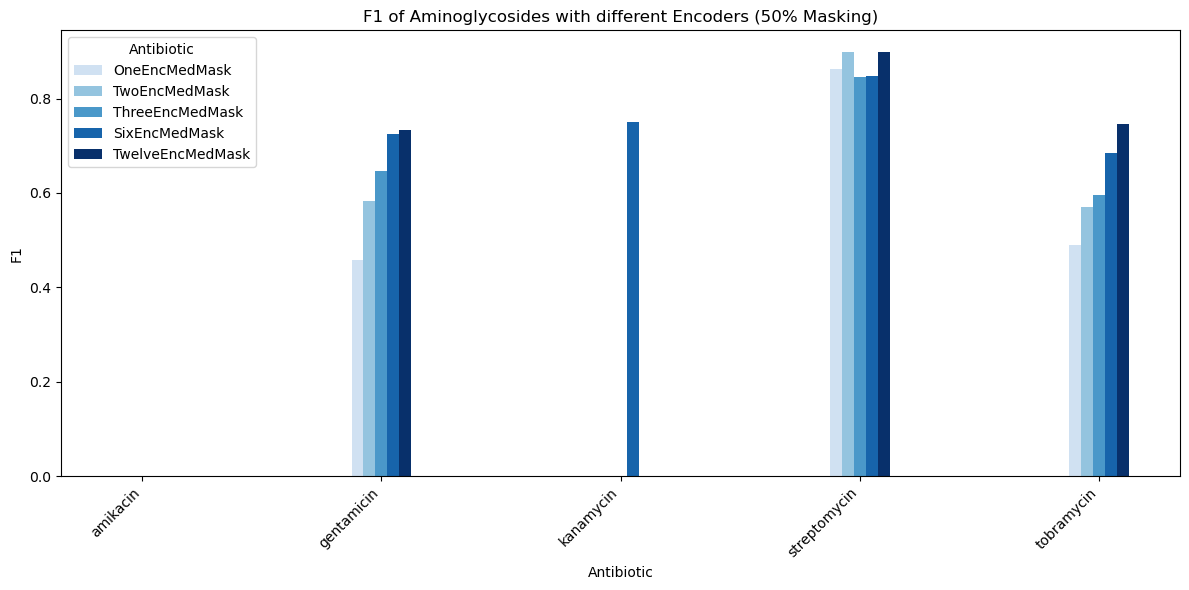

In [15]:
import matplotlib.pyplot as plt
import numpy as np

ab_list = open("antibiotic_list.txt","r")
ab_list = ab_list.read().splitlines()


selected_group = 'Aminoglycosides'
# mode = False # Set to False to plot sensitivity, True to plot specificity

# if mode:
#     df = specificity
#     type = 'Specificity'
# else :
#     df = sensitivity
#     type = 'Sensitivity'
df = f1_score_df
type = 'F1'
selected_rows = group_indices[selected_group]

selected_data = df.iloc[selected_rows]

df_transposed = selected_data.T

antibiotic_names = [ab_list[i] for i in selected_rows]

# Plotting
plt.figure(figsize=(12, 6))

# Define the positions of each group of bars
positions = np.arange(len(df_transposed.columns))

# Define the width of each bar
bar_width = 0.05  # Adjust the width here

# Generate color gradients for each group
num_groups = len(df_transposed)
colors = [plt.cm.Blues(i / num_groups + 0.2) for i in range(num_groups)]  # Adjust the start value here

# Iterate through each row (antibiotic) and plot its bars with different colors
for i, (antibiotic, row) in enumerate(df_transposed.iterrows()):
    plt.bar(positions + i * bar_width, row, width=bar_width, label=antibiotic, color=colors[i])

plt.xlabel('Antibiotic')
plt.ylabel(type)
plt.title(type+' of '+selected_group+' with different Encoders (50% Masking)')
plt.xticks(positions + (num_groups - 1) * bar_width / 2, antibiotic_names, rotation=45, ha='right')
plt.legend(title='Antibiotic')
plt.tight_layout()
plt.show()

Experiment 2 Embedding

In [148]:
##data
import pandas as pd
#Sensitivity
Emb32 = [0.0, 0.0, 0.8998178506375227, 1.0, 0.0, 0.37735849056603776, 0.5968586387434555, 0.0, 1.0, 1.0, 0.9611650485436893, 0.0, 0.004975124378109453, 0, 0.0, 0.16666666666666666, 0.0, 0.2669902912621359, 0.9333333333333333, 0.017543859649122806, 0.7296137339055794, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.5696969696969697, 0.0, 0.5, 0.0, 0.3902439024390244, 0.0, 1.0, 0.0, 0, 0.9418604651162791, 1.0, 0.7528735632183908, 0.8568627450980392, 0.0, 1.0, 0.017316017316017316, 0]
Emb64 = [0.0, 0.0, 0.7996357012750456, 0.47619047619047616, 0.0, 0.0, 0.7853403141361257, 0.008771929824561403, 1.0, 0.0, 0.17475728155339806, 0.10714285714285714, 0.6268656716417911, 0, 0.16666666666666666, 1.0, 1.0, 0.5388349514563107, 0.9, 0.0, 0.47639484978540775, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8787878787878788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0, 0.4418604651162791, 1.0, 0.9770114942528736, 0.7450980392156863, 0.0, 1.0, 0.3722943722943723, 0]
Emb128 = [0.0, 0.0, 0.8451730418943534, 0.38095238095238093, 0.0, 0.7547169811320755, 0.7696335078534031, 0.2894736842105263, 0.9931506849315068, 0.0, 0.44660194174757284, 0.39285714285714285, 0.582089552238806, 0, 0.3333333333333333, 0.8333333333333334, 1.0, 0.6456310679611651, 0.16666666666666666, 0.2631578947368421, 0.8025751072961373, 1.0, 0.4, 0.0, 0.24516129032258063, 0.0, 1.0, 0.9393939393939394, 0.0, 0.0, 0.5, 0.024390243902439025, 1.0, 0.0, 0.0, 0, 0.9069767441860465, 0.13333333333333333, 0.7528735632183908, 0.8333333333333334, 0.275, 0.8846153846153846, 0.5714285714285714, 0]
Emb256 = [0.0, 0.2375, 0.8397085610200364, 0.9523809523809523, 0.0, 0.6415094339622641, 0.774869109947644, 0.34210526315789475, 1.0, 0.16666666666666666, 0.4368932038834951, 0.9642857142857143, 0.572139303482587, 0, 0.16666666666666666, 0.3333333333333333, 0.0, 0.7572815533980582, 1.0, 0.2982456140350877, 0.7811158798283262, 0.0, 0.0, 0.0, 0.41935483870967744, 0.0, 1.0, 0.9151515151515152, 0.0, 0.0, 1.0, 0.4878048780487805, 0.3333333333333333, 0.0, 0.0, 0, 0.9127906976744186, 0.9111111111111111, 0.9195402298850575, 0.8176470588235294, 0.3, 1.0, 0.7229437229437229, 0]
Emb512 = [0.0, 0.3875, 0.8324225865209471, 1.0, 0.0, 0.7358490566037735, 0.7801047120418848, 0.47368421052631576, 0.9931506849315068, 0.16666666666666666, 0.39805825242718446, 0.8571428571428571, 0.7014925373134329, 0, 0.16666666666666666, 0.16666666666666666, 1.0, 0.7669902912621359, 1.0, 0.43859649122807015, 0.7939914163090128, 0.0, 0.4, 0.0, 0.535483870967742, 0.0, 0.0, 0.8909090909090909, 0.0, 0.0, 1.0, 0.5121951219512195, 0.3333333333333333, 0.3333333333333333, 0.0, 0, 0.9069767441860465, 0.9555555555555556, 0.8333333333333334, 0.8588235294117647, 0.45, 0.8461538461538461, 0.7359307359307359, 0]
Emb1024 = [0.0, 0.3375, 0.8542805100182149, 1.0, 0.0, 0.7735849056603774, 0.8115183246073299, 0.5263157894736842, 0.9931506849315068, 0.16666666666666666, 0.4854368932038835, 0.8571428571428571, 0.6965174129353234, 0, 0.16666666666666666, 0.6666666666666666, 0.0, 0.7669902912621359, 1.0, 0.631578947368421, 0.8283261802575107, 1.0, 0.0, 0.1111111111111111, 0.5935483870967742, 0.0, 0.0, 0.9030303030303031, 0.375, 0.0, 1.0, 0.7317073170731707, 0.3333333333333333, 0.6666666666666666, 0.038461538461538464, 0, 0.9186046511627907, 1.0, 0.9022988505747126, 0.8490196078431372, 0.6, 0.9230769230769231, 0.7748917748917749, 0]

data = {
    'Emb32' : Emb32,
    'Emb64' : Emb64,
    'Emb128' : Emb128,
    'Emb256' : Emb256,
    'Emb512' : Emb512,
    'Emb1024': Emb1024
    }
sensitivity = pd.DataFrame(data)
print(sensitivity)


       Emb32     Emb64    Emb128    Emb256    Emb512   Emb1024
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1   0.000000  0.000000  0.000000  0.237500  0.387500  0.337500
2   0.899818  0.799636  0.845173  0.839709  0.832423  0.854281
3   1.000000  0.476190  0.380952  0.952381  1.000000  1.000000
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
5   0.377358  0.000000  0.754717  0.641509  0.735849  0.773585
6   0.596859  0.785340  0.769634  0.774869  0.780105  0.811518
7   0.000000  0.008772  0.289474  0.342105  0.473684  0.526316
8   1.000000  1.000000  0.993151  1.000000  0.993151  0.993151
9   1.000000  0.000000  0.000000  0.166667  0.166667  0.166667
10  0.961165  0.174757  0.446602  0.436893  0.398058  0.485437
11  0.000000  0.107143  0.392857  0.964286  0.857143  0.857143
12  0.004975  0.626866  0.582090  0.572139  0.701493  0.696517
13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
14  0.000000  0.166667  0.333333  0.166667  0.166667  0

In [147]:
##data
import pandas as pd
#Specificity
Emb32 = [0.853125, 1.0, 0.4842105263157895, 0.0, 1.0, 0.9464720194647201, 0.7565982404692082, 1.0, 0.0, 0.203125, 0.0188953488372093, 1.0, 1.0, 0.0, 1.0, 0.8, 1.0, 0.9531914893617022, 0.125, 0.6821305841924399, 0.8086172344689379, 0.0, 0.0, 1.0, 1.0, 1.0, 0.4, 0.8833746898263027, 1.0, 0.5555555555555556, 1.0, 0.6465927099841522, 0.7333333333333333, 0.0, 1.0, 1.0, 0.664179104477612, 0.04, 0.7775, 0.49251497005988026, 1.0, 0.0, 0.9988901220865705, 1.0]
Emb64 = [1.0, 1.0, 0.7894736842105263, 0.9, 0.998422712933754, 1.0, 0.6070381231671554, 0.9869158878504672, 0.0, 1.0, 0.9171511627906976, 0.7272727272727273, 0.5479166666666667, 0.2222222222222222, 0.875, 0.0, 0.0, 0.9191489361702128, 0.25, 1.0, 0.9919839679358717, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8784119106699751, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.9601990049751243, 0.0, 0.465, 0.7664670658682635, 1.0, 0.022727272727272728, 0.974472807991121, 0.0]
Emb128 = [1.0, 1.0, 0.544360902255639, 0.9, 0.998422712933754, 0.9367396593673966, 0.6187683284457478, 0.9476635514018692, 0.03125, 1.0, 0.873546511627907, 0.9090909090909091, 0.83125, 1.0, 0.796875, 0.2, 0.0, 0.9148936170212766, 0.75, 0.9810996563573883, 0.9639278557114228, 0.0, 0.6842105263157895, 1.0, 0.9751434034416826, 1.0, 0.5, 0.890818858560794, 1.0, 1.0, 0.75, 1.0, 0.4, 1.0, 1.0, 0.0, 0.5895522388059702, 0.96, 0.875, 0.5793413173652695, 0.9855670103092784, 0.5, 0.9600443951165372, 0.25]
Emb256 = [1.0, 1.0, 0.6105263157894737, 0.0, 1.0, 0.9659367396593674, 0.8269794721407625, 0.9439252336448598, 0.0, 0.96875, 0.9244186046511628, 0.2727272727272727, 0.9041666666666667, 0.8333333333333334, 1.0, 1.0, 0.4117647058823529, 0.9340425531914893, 0.25, 0.9828178694158075, 0.9769539078156313, 0.5, 1.0, 1.0, 0.9894837476099426, 1.0, 0.7, 0.9578163771712159, 1.0, 0.6666666666666666, 0.0, 0.9920760697305864, 0.4666666666666667, 1.0, 1.0, 1.0, 0.7388059701492538, 0.64, 0.6525, 0.6661676646706587, 0.9896907216494846, 0.4090909090909091, 0.9589345172031076, 0.75]
Emb512 = [1.0, 0.9957219251336898, 0.8751879699248121, 0.1, 1.0, 0.9659367396593674, 0.8387096774193549, 0.9476635514018692, 0.0625, 0.984375, 0.934593023255814, 0.6363636363636364, 0.8895833333333333, 0.9444444444444444, 1.0, 1.0, 0.8823529411764706, 0.9361702127659575, 0.375, 0.9914089347079038, 0.9789579158316634, 1.0, 0.9473684210526315, 0.99836867862969, 0.9875717017208413, 1.0, 0.8, 0.9702233250620348, 1.0, 1.0, 0.25, 0.9984152139461173, 1.0, 0.0, 1.0, 0.5, 0.9203980099502488, 0.72, 0.79, 0.8413173652694611, 0.9896907216494846, 0.7045454545454546, 0.9700332963374029, 0.5]
Emb1024 = [1.0, 0.9946524064171123, 0.6541353383458647, 0.4, 1.0, 0.9610705596107056, 0.8152492668621701, 0.9271028037383178, 0.1875, 1.0, 0.8953488372093024, 0.6363636363636364, 0.8375, 1.0, 0.984375, 1.0, 1.0, 0.9393617021276596, 0.375, 0.9862542955326461, 0.9649298597194389, 0.0, 1.0, 1.0, 0.98565965583174, 1.0, 0.8, 0.9454094292803971, 1.0, 0.7777777777777778, 0.25, 0.9873217115689382, 1.0, 1.0, 1.0, 0.0, 0.7611940298507462, 0.48, 0.8925, 0.8008982035928144, 0.9896907216494846, 0.5681818181818182, 0.9655937846836848, 1.0]

data = {
    'Emb32' : Emb32,
    'Emb64' : Emb64,
    'Emb128' : Emb128,
    'Emb256' : Emb256,
    'Emb512' : Emb512,
    'Emb1024': Emb1024
    }
specificity = pd.DataFrame(data)
print(specificity)

       Emb32     Emb64    Emb128    Emb256    Emb512   Emb1024
0   0.853125  1.000000  1.000000  1.000000  1.000000  1.000000
1   1.000000  1.000000  1.000000  1.000000  0.995722  0.994652
2   0.484211  0.789474  0.544361  0.610526  0.875188  0.654135
3   0.000000  0.900000  0.900000  0.000000  0.100000  0.400000
4   1.000000  0.998423  0.998423  1.000000  1.000000  1.000000
5   0.946472  1.000000  0.936740  0.965937  0.965937  0.961071
6   0.756598  0.607038  0.618768  0.826979  0.838710  0.815249
7   1.000000  0.986916  0.947664  0.943925  0.947664  0.927103
8   0.000000  0.000000  0.031250  0.000000  0.062500  0.187500
9   0.203125  1.000000  1.000000  0.968750  0.984375  1.000000
10  0.018895  0.917151  0.873547  0.924419  0.934593  0.895349
11  1.000000  0.727273  0.909091  0.272727  0.636364  0.636364
12  1.000000  0.547917  0.831250  0.904167  0.889583  0.837500
13  0.000000  0.222222  1.000000  0.833333  0.944444  1.000000
14  1.000000  0.875000  0.796875  1.000000  1.000000  0

In [146]:
specificity_df = pd.DataFrame(specificity)
sensitivity_df = pd.DataFrame(sensitivity)


# Function to calculate F1 score
def calculate_f1_score(sensitivity, specificity):
    precision = sensitivity
    recall = specificity
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

# Calculate F1 score for each element
f1_score_df = pd.DataFrame(index=specificity_df.index, columns=specificity_df.columns)

for index, row in specificity_df.iterrows():
    for col in specificity_df.columns:
        sensitivity = sensitivity_df.at[index, col]
        specificity = row[col]
        f1_score = calculate_f1_score(sensitivity, specificity)
        f1_score_df.at[index, col] = f1_score

print("F1 Score DataFrame:")
print(f1_score_df)

F1 Score DataFrame:
       Emb32     Emb64    Emb128    Emb256    Emb512   Emb1024
0        0.0       0.0       0.0       0.0       0.0       0.0
1        0.0       0.0       0.0  0.383838  0.557889  0.503989
2   0.629613  0.794522  0.662206  0.707008   0.85327   0.74093
3        0.0  0.622837  0.535316       0.0  0.181818  0.571429
4        0.0       0.0       0.0       0.0       0.0       0.0
5   0.539585       0.0  0.835934  0.770984  0.835339  0.857196
6   0.667302  0.684773  0.686004  0.800077  0.808346   0.81338
7        0.0  0.017389  0.443481  0.502199  0.631645   0.67145
8        0.0       0.0  0.060593       0.0  0.117599  0.315446
9   0.337662       0.0       0.0  0.284404  0.285068  0.285714
10  0.037062  0.293576  0.591036  0.593357  0.558319  0.629548
11       0.0   0.18677  0.548628  0.425197  0.730435  0.730435
12  0.009901  0.584738  0.684707  0.700816   0.78442   0.76053
13       NaN       0.0       0.0       0.0       0.0       0.0
14       0.0      0.28  0.470046  0

C:\Users\erika\AppData\Local\Temp\ipykernel_16576\3605930391.py:9: RuntimeWarning: invalid value encountered in scalar divide
  f1_score = 2 * (precision * recall) / (precision + recall)


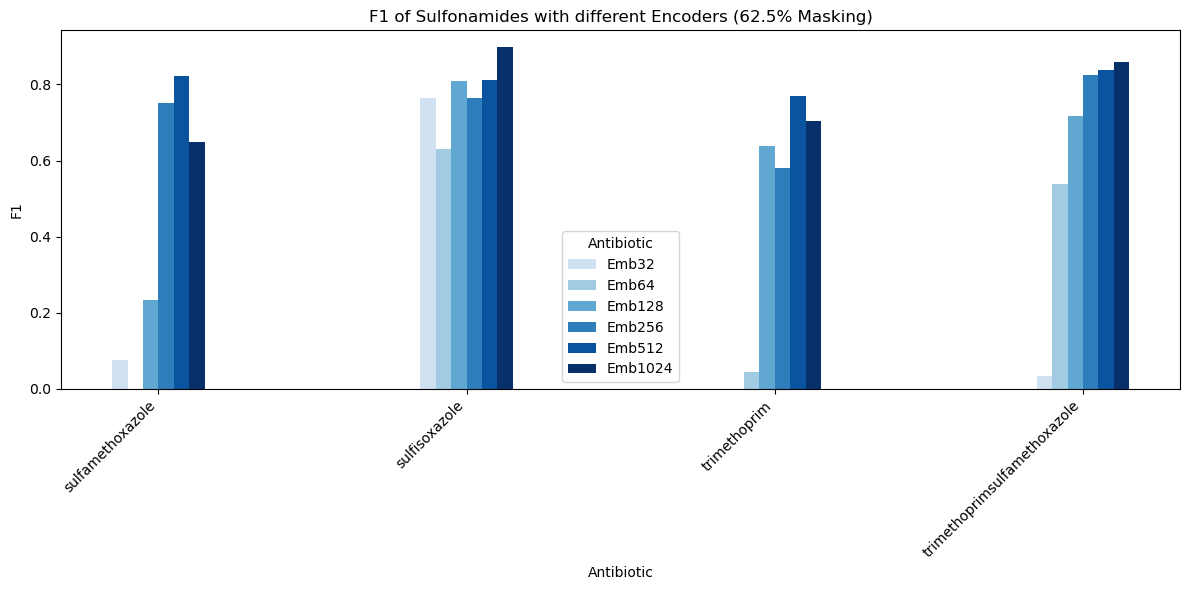

In [159]:
import matplotlib.pyplot as plt
import numpy as np

ab_list = open("antibiotic_list.txt","r")
ab_list = ab_list.read().splitlines()

selected_group = 'Sulfonamides'
# mode = False # Set to False to plot sensitivity, True to plot specificity

# if mode:
#     df = specificity
#     type = 'Specificity'
# else :
#     df = sensitivity
#     type = 'Sensitivity'
df = f1_score_df
type = 'F1'

selected_rows = group_indices[selected_group]

selected_data = df.iloc[selected_rows]

df_transposed = selected_data.T

antibiotic_names = [ab_list[i] for i in selected_rows]

# Plotting
plt.figure(figsize=(12, 6))

# Define the positions of each group of bars
positions = np.arange(len(df_transposed.columns))

# Define the width of each bar
bar_width = 0.05  # Adjust the width here

# Generate color gradients for each group
num_groups = len(df_transposed)
colors = [plt.cm.Blues(i / num_groups + 0.2) for i in range(num_groups)]  # Adjust the start value here

# Iterate through each row (antibiotic) and plot its bars with different colors
for i, (antibiotic, row) in enumerate(df_transposed.iterrows()):
    plt.bar(positions + i * bar_width, row, width=bar_width, label=antibiotic, color=colors[i])

plt.xlabel('Antibiotic')
plt.ylabel(type)
plt.title(type+' of '+selected_group+' with different Encoders (62.5% Masking)')
plt.xticks(positions + (num_groups - 1) * bar_width / 2, antibiotic_names, rotation=45, ha='right')
plt.legend(title='Antibiotic')
plt.tight_layout()
plt.show()